In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from src import image_metrics, io_utils, image_utils
from src.Tile import Tile

# Filtering by contrast

Now that we have square images, I am going to filter out low contrasting images using `tile_contrast` metric that I defined in `src.image_metrics`. First, I will crop images to square size, then apply the metric, which will chop image into equal squares and check contrast in each of them separately in order to remove images with solid backgrounds.

I am using user-defined class Tile, that is defined as square image + collection of operations that can be performed on it, to help with this step.

In [4]:
folder_list = [
    'dataset/google/azulejo',
    'dataset/google/portuguese tiles',
    'dataset/bing/azulejo',
    'dataset/bing/hand painted tile',
    'dataset/bing/handmade tile',
    'dataset/bing/portuguese tile'
]

Working on dataset/google/azulejo folder.
Contrasts of the images


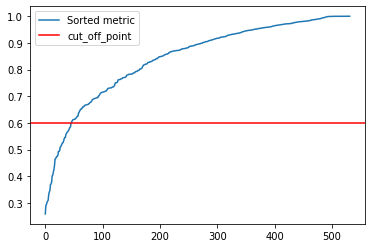

Random sample of low contrast files:


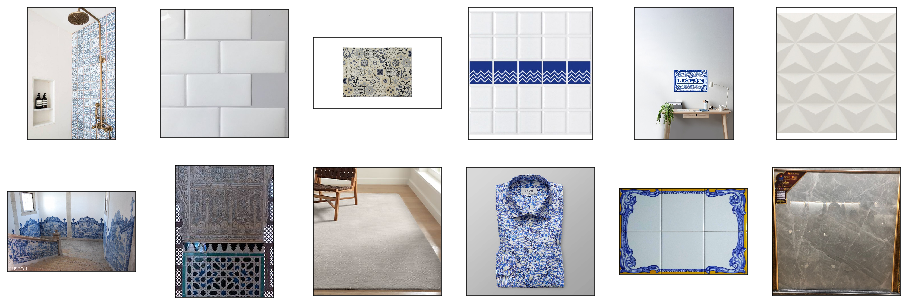

Random sample of contrasting files:


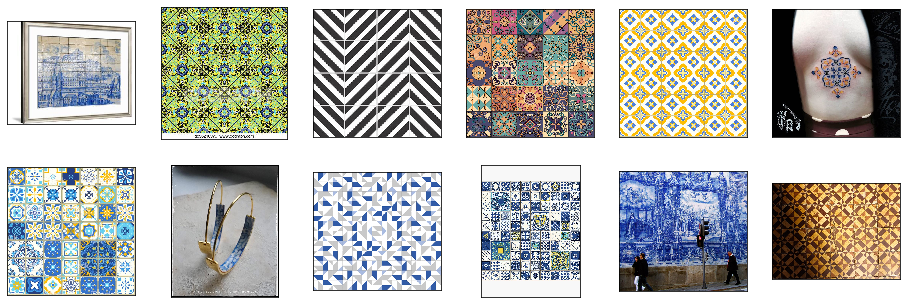

Total files: 532, out of them contrasting: 486.



Working on dataset/google/portuguese tiles folder.
Contrasts of the images


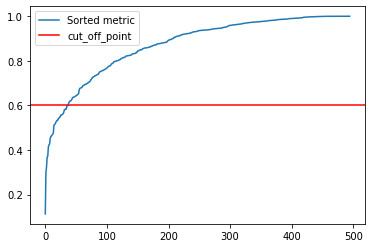

Random sample of low contrast files:


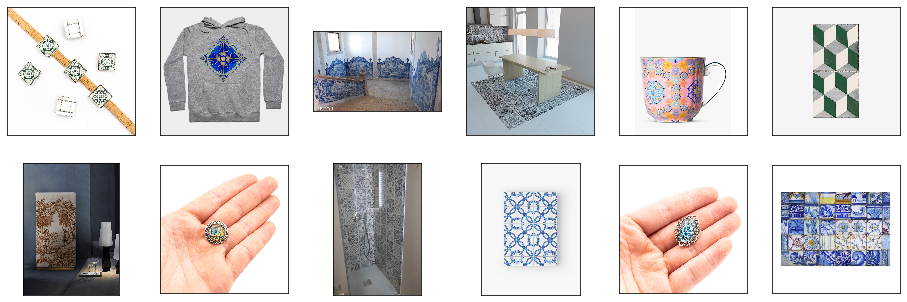

Random sample of contrasting files:


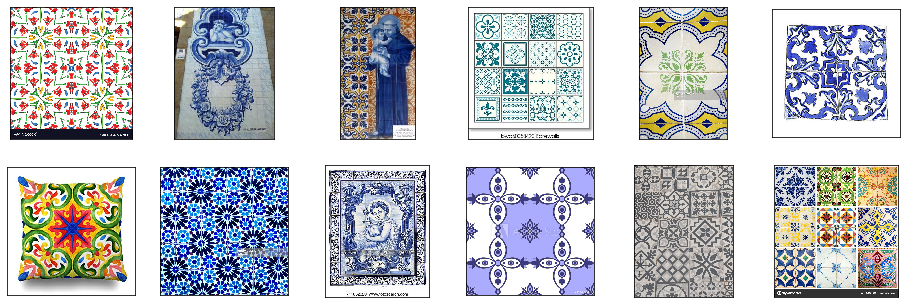

Total files: 495, out of them contrasting: 457.



Working on dataset/bing/azulejo folder.
Contrasts of the images


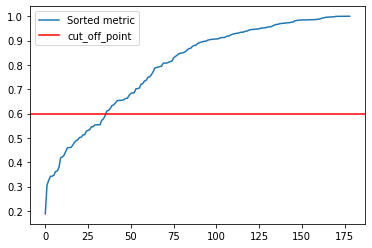

Random sample of low contrast files:


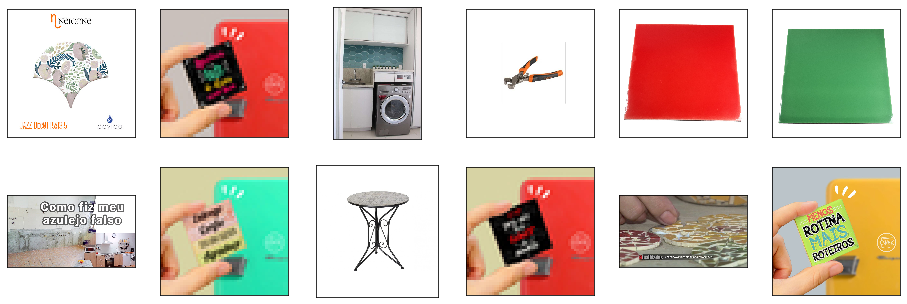

Random sample of contrasting files:


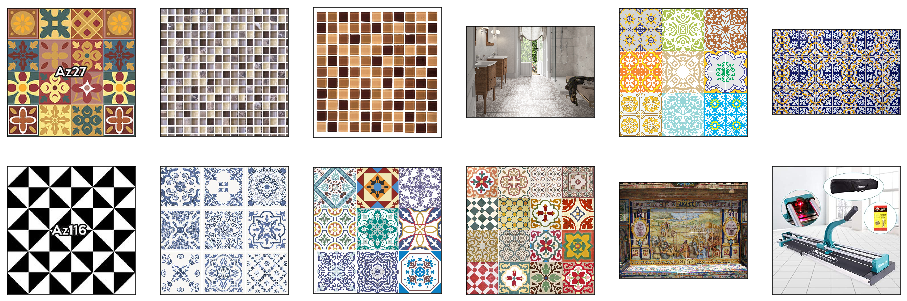

Total files: 179, out of them contrasting: 143.



Working on dataset/bing/hand painted tile folder.
Contrasts of the images


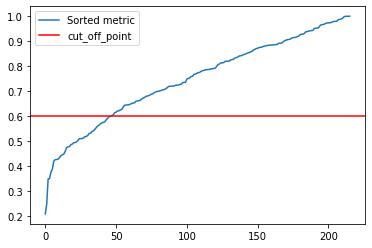

Random sample of low contrast files:


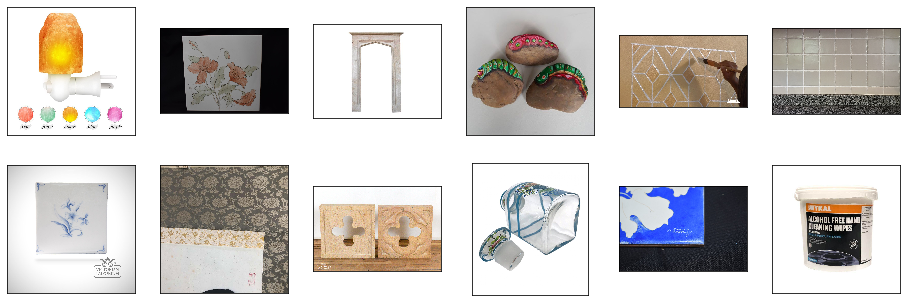

Random sample of contrasting files:


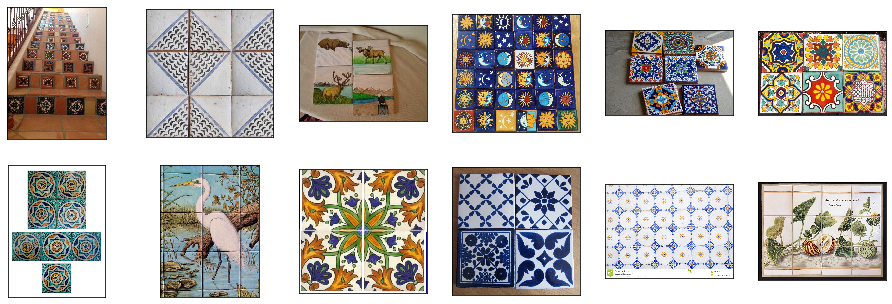

Total files: 216, out of them contrasting: 169.



Working on dataset/bing/handmade tile folder.
Contrasts of the images


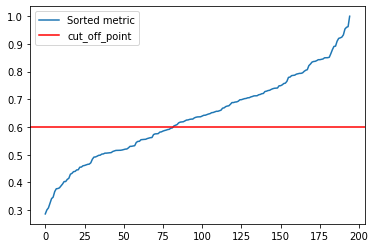

Random sample of low contrast files:


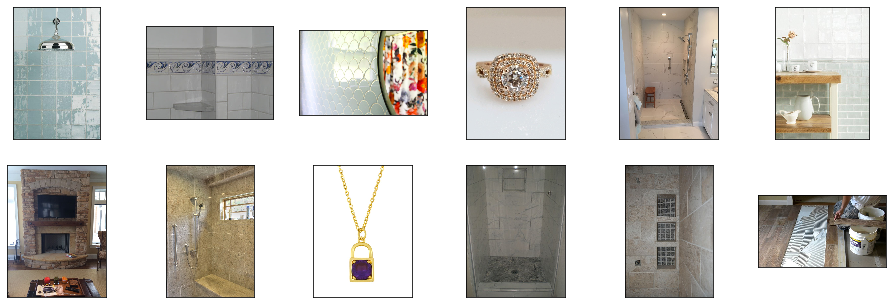

Random sample of contrasting files:


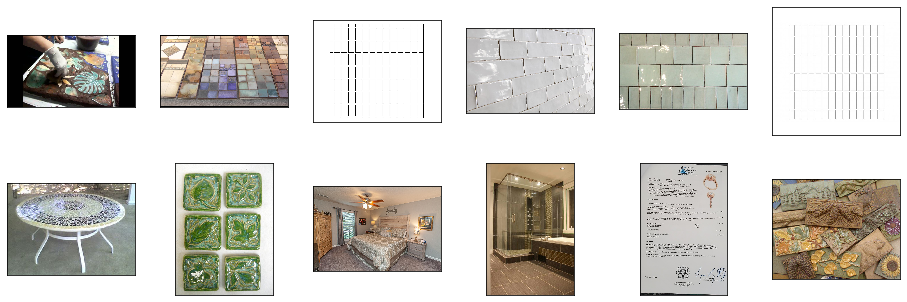

Total files: 195, out of them contrasting: 113.



Working on dataset/bing/portuguese tile folder.
Contrasts of the images


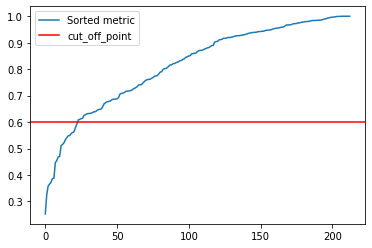

Random sample of low contrast files:


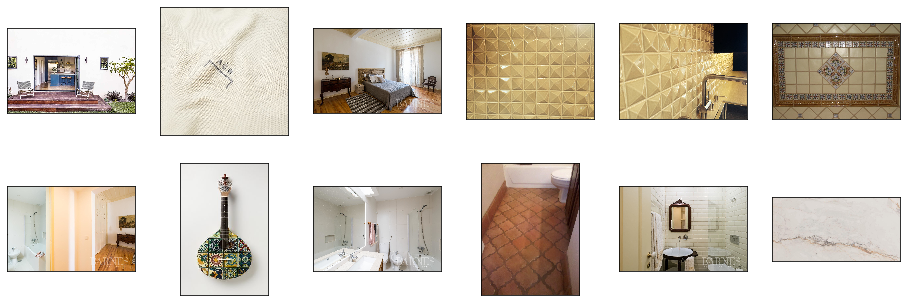

Random sample of contrasting files:


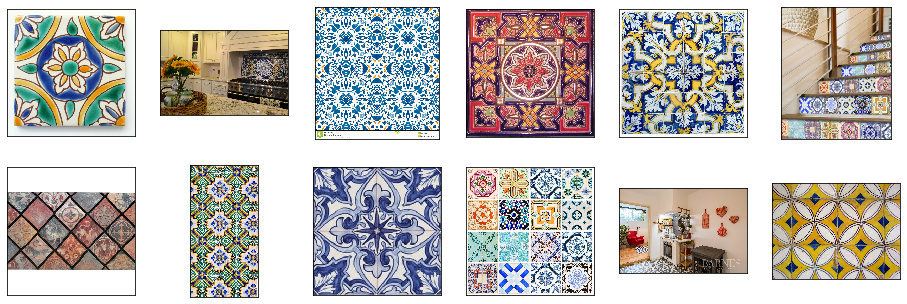

Total files: 213, out of them contrasting: 190.





In [5]:
plot_sample = 12
cut_off = 0.6

for folder in folder_list:
    print('Working on {} folder.'.format(folder))
    files = [_ for _ in os.listdir(folder)  if _.endswith(".jpg")]
    
    imgs = io_utils.read_imgs(files, folder)
    tiles = [Tile(image_utils.resize(image_utils.crop(img), (128, 128))) for img in imgs]
    contrasts = list(map(image_metrics.tile_uniform_contrast, tiles))
    
    print('Contrasts of the images')
    io_utils.plot_metric(contrasts, cut_off)
    
    sample_contrasting  = [_[0] for _ in zip(files, contrasts) if _[1] >= cut_off]
    sample_other = [_ for _ in files if _ not in sample_contrasting]
    
    print('Random sample of low contrast files:')
    io_utils.plot_sample_files(sample_other, folder=folder, plot_sample=min(plot_sample, len(sample_other)))
    
    print('Random sample of contrasting files:')
    io_utils.plot_sample_files(sample_contrasting, folder=folder, plot_sample=min(plot_sample, len(sample_contrasting)))
    
    print('Total files: {}, out of them contrasting: {}.'.format(len(files), len(sample_contrasting)))
#     
#     with open('lists/contrasting_{}.txt'.format(folder.replace('/', '-')), 'w') as filehandle:
#         for filename in sample_contrasting:
#             filehandle.write('%s\n' % filename)
            
    print('\n\n')